In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [2]:
#downloading image
!wget "https://thumbs.dreamstime.com/b/butterfly-flower-23417093.jpg"

--2022-12-20 07:22:02--  https://thumbs.dreamstime.com/b/butterfly-flower-23417093.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53488 (52K) [image/jpeg]
Saving to: ‘butterfly-flower-23417093.jpg.1’

butterfly-flower-23 100%[===================>]  52.23K  --.-KB/s    in 0.006s  

2022-12-20 07:22:02 (7.88 MB/s) - ‘butterfly-flower-23417093.jpg.1’ saved [53488/53488]



In [3]:
image = cv2.imread("/content/butterfly-flower-23417093.jpg")


In [4]:
image.shape

(531, 800, 3)

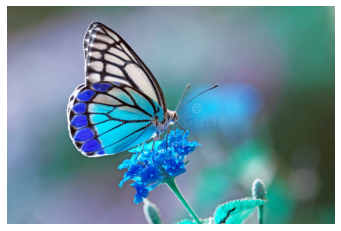

In [5]:
plt.axis("off")
plt.imshow(image)
plt.show()

In [6]:
rgb_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

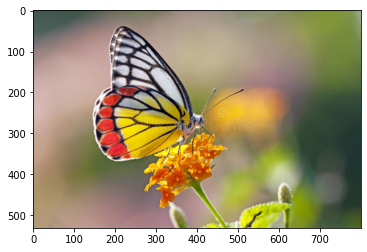

In [7]:
plt.imshow(rgb_img)

In [8]:
#flattening the image because KMeans of sklearn only accepts 2d array
new_img = rgb_img.reshape(-1,3)
new_img.shape

(424800, 3)

Kmeans algorithm

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10)

In [10]:
km.fit(new_img)

KMeans(n_clusters=10)

In [11]:
km.cluster_centers_

array([[140.54012311, 126.04136553, 103.02306206],
       [ 45.080315  ,  57.9846914 ,  48.62635108],
       [228.69650111, 196.37550775,  17.44737814],
       [ 89.10232722,  96.52924521,  75.1891121 ],
       [169.27927274, 146.79393799, 127.8321282 ],
       [200.44204068,  82.20962222,  18.67872134],
       [219.05581019, 217.37458434, 217.52062551],
       [124.73256072, 135.84468006,  56.14747873],
       [194.67049356, 169.03997933,  75.40067924],
       [194.93776304, 173.50436807, 155.59316414]])

In [12]:
centers = km.cluster_centers_
print(centers)

#we neeed to convert centers to integers to represent pixel values for each color
c= np.array(centers,dtype="uint8")
c

[[140.54012311 126.04136553 103.02306206]
 [ 45.080315    57.9846914   48.62635108]
 [228.69650111 196.37550775  17.44737814]
 [ 89.10232722  96.52924521  75.1891121 ]
 [169.27927274 146.79393799 127.8321282 ]
 [200.44204068  82.20962222  18.67872134]
 [219.05581019 217.37458434 217.52062551]
 [124.73256072 135.84468006  56.14747873]
 [194.67049356 169.03997933  75.40067924]
 [194.93776304 173.50436807 155.59316414]]


array([[140, 126, 103],
       [ 45,  57,  48],
       [228, 196,  17],
       [ 89,  96,  75],
       [169, 146, 127],
       [200,  82,  18],
       [219, 217, 217],
       [124, 135,  56],
       [194, 169,  75],
       [194, 173, 155]], dtype=uint8)

**what all colors are these?**

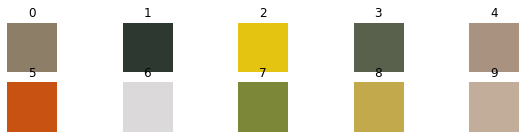

In [42]:
k = 10 #10 clusters
plt.figure(figsize=(10,2))
colors = []
for i in range(k):
  im = np.zeros((100,100,3),dtype="uint8")
  plt.subplot(2,5,i+1)
  im[:,:,:] = c[i]
  plt.axis("off")
  colors.append(im)
  plt.title(str(i))
  plt.imshow(im)
plt.show()

In [14]:
len(colors)

10

In [23]:
labels = km.labels_ #returns cluster label for each pixel

True

In [16]:
seg_img = np.zeros(new_img.shape,dtype="uint8")
l = 0
for px in new_img:
  seg_img[l] = c[labels[l]]
  l = l+1  

In [17]:
print(seg_img)
print(seg_img.shape)

[[89 96 75]
 [89 96 75]
 [89 96 75]
 ...
 [89 96 75]
 [89 96 75]
 [89 96 75]]
(424800, 3)


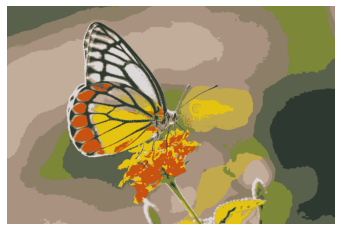

In [18]:
plt.axis("off")
plt.imshow(seg_img.reshape(image.shape)) #reshaping the flattened image to shape of original image and printing it
plt.show()

In [49]:
5 in labels

True

Suppose We only want reddish part of image others as white
(project is over, doing only for fun)

As we can see in the colors plot that it is color of 9th centers

In [59]:
#creating a new image in which we want specific color others white
new_seg = np.zeros(new_img.shape, dtype="uint8") #flattened image
print(new_colors)
i = 0
for i in range(new_seg.shape[0]):
  if labels[i] == 5:
    new_seg[i] = c[5]
  else:
    new_seg[i] = [255,255,255]


[array([200,  82,  18], dtype=uint8), array([228, 196,  17], dtype=uint8)]


array([228, 196,  17], dtype=uint8)

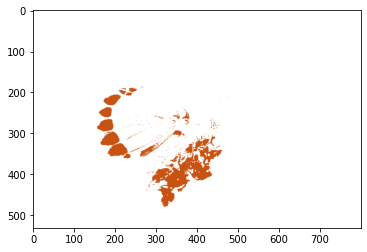

In [60]:
plt.imshow(new_seg.reshape(image.shape))